In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv('MCS_publications_author_order.csv')
d.Authorship_Type = pd.Categorical(d.Authorship_Type, categories=["First", "Second", "Senior", "Other"], ordered=True)
d.Year = d.Year.astype('int16')
print(len(d))
print(d)

447
                                     DOI                      Journal  Year  \
0           10.1371/journal.pone.0155235                     PLOS ONE  2016   
1              10.1017/s003060531300135x                         Oryx  2014   
2               10.1038/nplants.2015.142                Nature Plants  2015   
3               10.1038/nplants.2015.142                Nature Plants  2015   
4        10.1016/j.gloenvcha.2015.06.007  Global Environmental Change  2015   
..                                   ...                          ...   ...   
442                   10.3390/rs12122041               Remote Sensing  2020   
443                   10.3390/rs12122041               Remote Sensing  2020   
444                   10.3390/rs12122041               Remote Sensing  2020   
445  https://doi.org/10.3390/land9080239                         Land  2020   
446  https://doi.org/10.3390/land9080239                         Land  2020   

                                               

# First just plot raw authorships
This means that some publications (where there are multiple MCS authors) might be counted multiple times

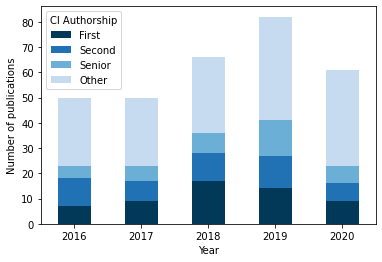

In [102]:
d_by_year = d.loc[d['Year'] > 2015, :].groupby(['Year','Authorship_Type'])['Authorship_Type'].count().unstack('Authorship_Type').fillna(0)
ax = d_by_year.plot.bar(stacked=True, rot=0, color=['#023858', '#2171b5', '#6baed6', '#c6dbef'])
ax.set(ylabel="Number of publications")
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_bar.png', dpi=500, transparent=True)

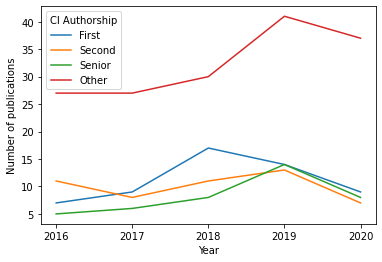

In [3]:
ax = d_by_year.plot(kind='line', rot=0)
ax.set(ylabel="Number of publications", xticks=np.arange(2016, 2021))
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_line.png', dpi=500, transparent=True)

# Now plot each pub only once, using the "highest" level of authorship from that pub

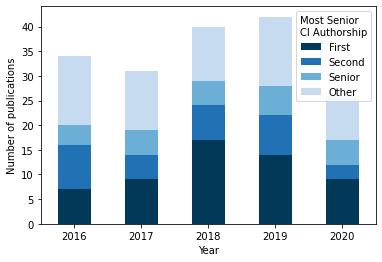

In [103]:
# Note for the below that the "max_authorship" is actually the minimum of the Authorship_Type field given the way the categories are ordered for plotting
d_perpub = d.loc[d['Year'] > 2015, :].groupby(
    ['DOI', 'Year']).agg(
    max_authorship=pd.NamedAgg(column='Authorship_Type', aggfunc=min))
d_perpub.max_authorship = pd.Categorical(d_perpub.max_authorship, categories=["First", "Second", "Senior", "Other"], ordered=True)
d_perpub = d_perpub.groupby(['Year','max_authorship'])['max_authorship'].count().unstack('max_authorship').fillna(0)
ax = d_perpub.plot.bar(rot=0, stacked=True, color=['#023858', '#2171b5', '#6baed6', '#c6dbef'])
ax.set(ylabel="Number of publications")
ax.legend(title='Most Senior\nCI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar.png', dpi=500, transparent=True)

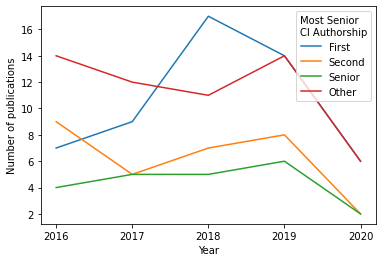

In [196]:
ax = d_perpub.plot(kind='line', rot=0)
ax.set(ylabel="Number of publications", xticks=np.arange(2016, 2021))
ax.legend(title='Most Senior\nCI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_line.png', dpi=500, transparent=True)

# Now lump various categories of seniority

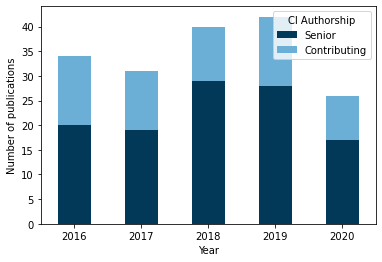

In [108]:
# Note for the below that the "max_authorship" is actually the minimum of the Authorship_Type field given the way the categories are ordered for plotting

d_perpub = d.loc[d['Year'] > 2015, :].groupby(
    ['DOI', 'Year']).agg(
    max_authorship=pd.NamedAgg(column='Authorship_Type', aggfunc=min))
d_perpub = d_perpub.replace({'max_authorship' : {"First": "Senior",
                                                 "Second": "Senior",
                                                 "Other": "Contributing"}})
d_perpub.max_authorship = pd.Categorical(d_perpub.max_authorship, categories=["Senior", "Contributing"], ordered=True)
d_perpub = d_perpub.groupby(['Year','max_authorship'])['max_authorship'].count().unstack('max_authorship').fillna(0)
ax = d_perpub.plot.bar(stacked=True, rot=0, color=['#023858', '#6baed6'])
ax.set(ylabel="Number of publications")
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar_aggregated.png', dpi=500, transparent=True)

In [ ]:
d_perpub = d_perpub.groupby(['Year','max_authorship'])['max_authorship'].count().unstack('max_authorship').fillna(0)
ax = d_perpub.plot(kind='bar', stacked=True, rot=0)
ax.set(ylabel="Number of publications")
ax.legend(title='Most Senior\nCI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar.png', dpi=500, transparent=True)

# Plot citations

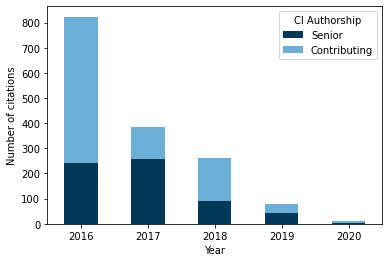

In [107]:
# Note for the below that the "max_authorship" is actually the minimum of the Authorship_Type field given the way the categories are ordered for plotting
d_perpub = d.loc[d['Year'] > 2015, :].groupby(
    ['DOI', 'Year', 'Citations']).agg(
    max_authorship=pd.NamedAgg(column='Authorship_Type', aggfunc=min))
d_perpub = d_perpub.replace({'max_authorship' : {"First": "Senior",
                                                 "Second": "Senior",
                                                 "Other": "Contributing"}})
d_perpub.max_authorship = pd.Categorical(d_perpub.max_authorship, categories=["Senior", "Contributing"], ordered=True)
d_perpub = d_perpub.reset_index().groupby(['Year','max_authorship']).agg({'Citations': ['sum']}).unstack('max_authorship').fillna(0)
d_perpub.columns = ['Senior', 'Contributing']
ax = d_perpub.plot.bar(stacked=True, rot=0, color=['#023858', '#6baed6'])
ax.set(ylabel="Number of citations")
ax.legend(title='CI Authorship')
ax.figure.savefig('MCS_pubs_by_year_most_senior_bar_aggregated_citations.png', dpi=500, transparent=True)

# Number of publications per MCS author

In [4]:
this_d = d
this_d = this_d.replace({'Authorship_Type' : {"First": "Senior",
                                              "Second": "Senior",
                                              "Other": "Contributing"}})
this_d = this_d.loc[this_d['Year'] > 2015, :].groupby(['Matched_Author', 'Year', 'Authorship_Type']).agg(Count=('Authorship_Type', 'count'))
print(this_d)
this_d.to_excel('MCS_publication_by_year_by_author_long.xlsx')



                                               Count
Matched_Author           Year Authorship_Type       
Acero, Natalia           2016 Contributing         1
Ahumada, Jorge           2016 Contributing         2
                              Senior               2
                         2017 Senior               2
                         2018 Contributing         1
...                                              ...
Zvoleff, Alexander, Alex 2016 Contributing         1
                         2018 Senior               3
                         2019 Contributing         2
                              Senior               1
                         2020 Contributing         1

[209 rows x 1 columns]


In [42]:
this_d = d
this_d = this_d.replace({'Authorship_Type' : {"First": "Senior",
                                              "Second": "Senior",
                                              "Other": "Contributing"}})
this_d = this_d.loc[this_d['Year'] > 2015, :].groupby(['Matched_Author', 'Year', 'Authorship_Type']).agg(Count=('Authorship_Type', 'count'))
this_d = this_d.reset_index()
this_d = this_d.pivot(index='Matched_Author', columns=['Year', 'Authorship_Type'], values='Count')
print(this_d)
this_d = this_d.groupby(['Matched_Author', 'Year']).Count.sum()
print(this_d)
this_d.to_excel('MCS_publication_by_year_by_author_wide.xlsx')

Year                                   2016          2017         2018         \
Authorship_Type                Contributing Senior Senior Contributing Senior   
Matched_Author                                                                  
Acero, Natalia                          1.0    NaN    NaN          NaN    NaN   
Ahumada, Jorge                          2.0    2.0    2.0          1.0    2.0   
Alam, Mahbubul                          NaN    NaN    1.0          NaN    1.0   
Andelman, Sandy                         1.0    2.0    NaN          1.0    NaN   
Bonham, Curan                           NaN    1.0    NaN          NaN    NaN   
Cano, Carlos, Andres                    NaN    NaN    NaN          1.0    NaN   
Collins, Pamela                         NaN    NaN    NaN          NaN    NaN   
Cooper, Matthew, Matthew                NaN    NaN    NaN          NaN    1.0   
Cooperman, Michael                      NaN    NaN    NaN          NaN    1.0   
Costedoat, Sebastien        

KeyError: 'Year'